# Auxilaries Computations

## Nucleation and Aggregation kernel behavior

In [1]:
%load_ext autoreload
%load_ext vscode_debugger_magic
%env NUMBA_DISABLE_JIT=0
%autoreload 2
import numpy as np
import simulate
import matplotlib.pyplot as plt
from utils_cm_toolbox import numericals as cmtools
from utils import exponential_decay 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The vscode_debugger_magic extension is already loaded. To reload it, use:
  %reload_ext vscode_debugger_magic
env: NUMBA_DISABLE_JIT=0


In [2]:
# %vscodedebugger

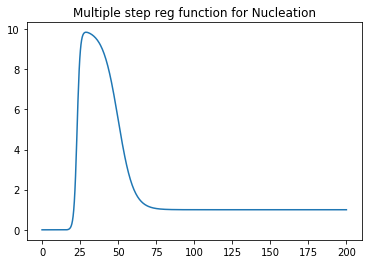

In [3]:
plt.figure()
xspan = np.linspace(0, 200, 501)
Ai = [10.0, 1.0]
xEi = [23.0, 50.0]
psi = [0.5, 0.1]
y = cmtools.regularization_mult_func(xspan, 0.0, Ai, xEi, psi)
plt.plot(xspan, y)
plt.title('Multiple step reg function for Nucleation')
plt.show()

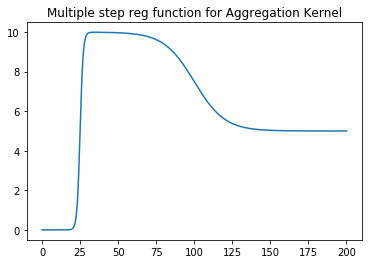

In [4]:
plt.figure()
xspan = np.linspace(0, 200, 501)
Ai = [10.0, 5.0]
xEi = [25.0, 100.0]
psi = [0.5, 0.05]
y = cmtools.regularization_mult_func(xspan, 0.0, Ai, xEi, psi)
plt.plot(xspan, y)
plt.title('Multiple step reg function for Aggregation Kernel')
plt.show()

In [5]:
y = cmtools.regularization_mult_func(xspan, 1e-4, Ai, xEi, psi)

ISSUE: this regularization function provides negative values in the startup, thus may lead to issues!

Should I consider another function?

Profiling the regularization function showed that it is very slow (20s to 40s increasing) !

Testing:
    - Log-normal

In [6]:
def log_normal(x, mean, sig):
    t1 = 1.0/(sig*x*np.sqrt(2.0*np.pi))
    t2 = (np.log(x)-mean)**2 / (2.0*sig**2)
    r = np.exp(-(t2))
    return r

def log_normal_mod_behavior(t, p):
    mean, sig, low_bound, amp, tcut = p
    if t < tcut:
        r = 0.0 
    else:
        r = amp * log_normal((t-tcut), mean, sig) + low_bound
    return r  

def nucl_dynamic_behavior(t, p):
    log_normal_mod_behavior(t, p)
    return r

def agg_dynamic_behavior(t, p):
    mean, sig, low_bound, amp = p
    tcut = 25.0
    if t < tcut:
        r = 0.0 
    else:
        r = log_normal((t-tcut), mean, sig) + low_bound
    return r
    

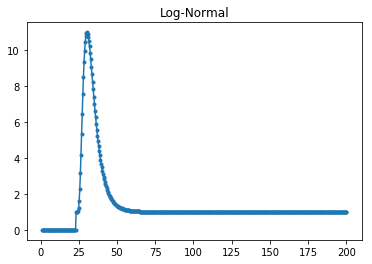

In [7]:
plt.figure()
xspan = np.linspace(1.0, 200.0, 501)
mean = 2.0
sig = 0.5
low_b = 1.0
amp = 10.0
t_cut = 23.0
p = (mean, sig, low_b, amp, t_cut)
y = np.array([log_normal_mod_behavior(x, p) for x in xspan])
plt.plot(xspan, y, '.-')
plt.title('Log-Normal')
plt.show()

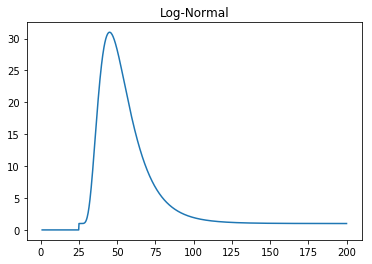

In [8]:
plt.figure()
xspan = np.linspace(1.0, 200.0, 1001)
mean = 3.0
sig = 0.5
low_b = 1.0
amp = 30.0
t_cut = 25.0
p = (mean, sig, low_b, amp, t_cut)
y = np.array([log_normal_mod_behavior(x, p) for x in xspan])
plt.plot(xspan, y, '-')
plt.title('Log-Normal')
plt.show()

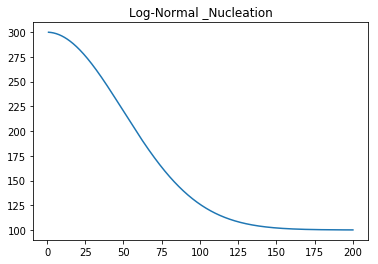

In [9]:
xspan = np.linspace(1.0, 200.0, 1001)
# mean, sig, low_bound, amp, tcut = (2.0, 1.25, 0.0, 50e2, 0.0)
# r = amp * log_normal((xspan + 1e-5), mean, sig) + low_bound
kb, b_low_b, b_sigma = (3e2, 1e2, 35.0)
r = exponential_decay(xspan, kb, b_low_b, b_sigma)
plt.plot(xspan, r, '-')
plt.title('Log-Normal _Nucleation')
plt.show()

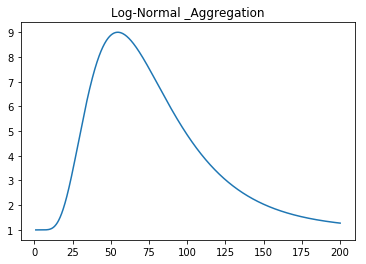

In [11]:
xspan = np.linspace(1.0, 200.0, 1001)
mean, sig, low_bound, amp, tcut = (4.0, 0.5, 1.0, 0.8e1, 0.0)
r = amp * log_normal((xspan + 1e-5), mean, sig) + low_bound
plt.plot(xspan, r, '-')
plt.title('Log-Normal _Aggregation')
plt.show()

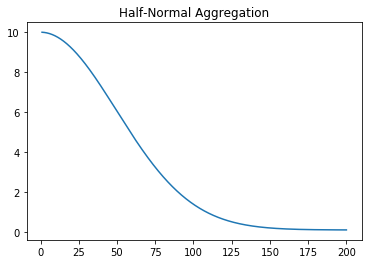

In [13]:
xspan = np.linspace(1.0, 200.0, 1001)
# mean, sig, low_bound, amp, tcut = (2.0, 1.25, 0.0, 50e2, 0.0)
# r = amp * log_normal((xspan + 1e-5), mean, sig) + low_bound
kb, b_low_b, b_sigma = (10.0, 0.1, 35.0)
r = exponential_decay(xspan, kb, b_low_b, b_sigma)
plt.plot(xspan, r, '-')
plt.title('Half-Normal Aggregation')
plt.show()

In [5]:
import sys
import time

for i in range (10):  
#     sys.stdout.write('\r'+str(i))
#     time.sleep(0.5)
    print('\r'+str(i), flush=True, end='')
    time.sleep(0.5)

9